In [1]:
import pandas as pd
import numpy as np
import os.path
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize          
import nltk
import spacy

In [2]:
path = os.getcwd()
path
parent_folder, current_folder = os.path.split(path)
parent_folder

'/Users/jamoth/DSR/DSRCompTwo'

In [3]:
df = pd.read_csv(parent_folder + '/0.Raw_data/train/Combined_News_DJIA_train.csv')
df.head(5)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0.0,"b""Georgia 'downs two Russian warplanes' as cou...",NaN,b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1.0,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',NaN
2,2008-08-12,0.0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0.0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""",NaN,b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1.0,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,b'Bank analyst forecast Georgian crisis

# merging all headlines for each day

In [4]:
# combine all text headlines together in one text and convert to string
subdf = df.iloc[:,2:27] 
subdf = subdf.applymap(str)
s = subdf.apply(lambda x: ' '.join(x), axis=1)

# replace the b' and b" which are in the beginning of some headlines
s = s.str.replace("b'","")
s = s.str.replace('b"','')

In [5]:
# create a new dataframe with all headlines and the overall word count
df1 = s.to_frame(name='headlines')
df1['lengths'] = df1['headlines'].apply(len)
df1['label'] = df['Label']
df1['date'] = df['Date']

In [6]:
df1.headlines.head(50)

0     Georgia 'downs two Russian warplanes' as count...
1     Why wont America and Nato help us? If they won...
2     Remember that adorable 9-year-old who sang at ...
3      U.S. refuses Israel weapons to attack Iran: r...
4     All the experts admit that we should legalise ...
5     Mom of missing gay man: Too bad he's not a 21-...
6     In an Afghan prison, the majority of female pr...
7     Man arrested and locked up for five hours afte...
8     Two elderly Chinese women have been sentenced ...
9     British resident held in Guantanamo Bay wins l...
10    Syria says its ready to put a Russian missile ...
11    N Korea's Kim died in 2003; replaced by lookal...
12    North Korea halts denuclearisation after US fa...
13    Photos of a 15-year-old Iraqi suicide bomber w...
14    Military help for Georgia is a 'declaration of...
15    Russian Prime Minister Vladimir Putin has accu...
16    A girl filmed Israeli soldiers' brutality. Sin...
17    Poland Legalization of Marijuana - two maj

# Plot distribution of text lengths

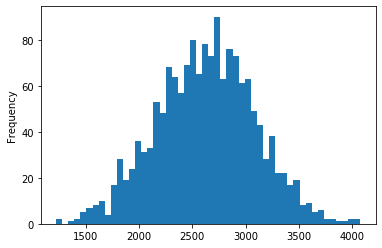

In [7]:
# plot the distribution of text lengths
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
df1['lengths'].plot(bins=50,kind = 'hist')

# Lemmatize words
two approaches:
1. using WordNet
2. using SpaCy

In [8]:
# create a WordNet tokenizer
wrd_lemmatizer = WordNetLemmatizer()

def wn_tokenizer(doc):
    tokens = word_tokinze(doc)
    return wrd_lemmatizer.lemmatize(tokens, pos='v')

In [9]:
# create a spaCy tokenizer
spacy.load('en')
lemmatizer = spacy.lang.en.English()

# tokenize the doc and lemmatize its tokens
def spacy_tokenizer(doc):
    tokens = lemmatizer(doc)
    return([token.lemma_ for token in tokens])

# Process texts
1. transform to lower case words
2. remove punctuations
3. remove stopwords

In [10]:
# create function to clean the text
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Lower case of all words
    2. Remove all punctuation
    3. Remove all stopwords
    4. Returns a list of the cleaned text
    """
    
    # transforms all to lower case words
    mess = mess.lower()
    
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word not in stopwords.words('english')]

In [11]:
# test if text_process function works 
df1['headlines'].head(5).apply(text_process)

0    [georgia, downs, two, russian, warplanes, coun...
1    [wont, america, nato, help, us, wont, help, us...
2    [remember, adorable, 9yearold, sang, opening, ...
3    [us, refuses, israel, weapons, attack, iran, r...
4    [experts, admit, legalise, drugs, war, south, ...
Name: headlines, dtype: object

# 5. Create CountVectorizer

In [12]:
# create CountVectorizer with the processing function and the Wordnet_tokenizer
BoW_WordNet = CountVectorizer(analyzer=text_process, tokenizer=wn_tokenizer)
BoW_WordNet_Headlines = BoW_WordNet.fit_transform(df1['headlines'])
BoW_WordNet_Headlines

<1584x35198 sparse matrix of type '<class 'numpy.int64'>'
	with 391499 stored elements in Compressed Sparse Row format>

In [13]:
# test CV  
first_vector_BoW_WordNet = BoW_WordNet_Headlines[0]
df_first_vector_BoW_WordNet = pd.DataFrame(first_vector_BoW_WordNet.T.todense(), index=BoW_WordNet.get_feature_names(), columns=["cv"])
df_first_vector_BoW_WordNet.sort_values(by=["cv"],ascending=False)

,cv
georgia,9
south,7
ossetia,7
war,5
russian,5
...,...
established,0
establish,0
essex,0
essentially,0


In [14]:
# create CountVectorizer with the processing function and the spacy_tokenizer
BoW_Spacy = CountVectorizer(analyzer=text_process, tokenizer=spacy_tokenizer)
BoW_Spacy_Headlines = BoW_Spacy.fit_transform(df1['headlines'])
BoW_Spacy_Headlines

<1584x35198 sparse matrix of type '<class 'numpy.int64'>'
	with 391499 stored elements in Compressed Sparse Row format>

In [15]:
# test CV  
first_vector_BoW_Spacy = BoW_Spacy_Headlines[0]
df_first_vector_BoW_Spacy = pd.DataFrame(first_vector_BoW_Spacy.T.todense(), index=BoW_Spacy.get_feature_names(), columns=["cv"])
df_first_vector_BoW_Spacy.sort_values(by=["cv"],ascending=False)

,cv
georgia,9
south,7
ossetia,7
war,5
russian,5
...,...
established,0
establish,0
essex,0
essentially,0


# 6. Create TF-IDF (in two different ways)
- CountVectorizer + TfidfTransformer
- TfidfVectorizer

In [16]:
# first approach: use the CountVectorizer and TfidfTransform
# create a TFIDF transformer
tfidf_WordNet = TfidfTransformer().fit(BoW_WordNet_Headlines)
tfidf_WordNet

# calculate tf-idf scores
tfidf_WordNet_headlines = tfidf_WordNet.transform(BoW_WordNet_Headlines)
tfidf_WordNet_headlines

<1584x35198 sparse matrix of type '<class 'numpy.float64'>'
	with 391499 stored elements in Compressed Sparse Row format>

In [17]:
# test TFIDF with the example above 
first_vector_tfidf_WordNet = tfidf_WordNet_headlines[0]
df_first_vector_tfidf_WordNet = pd.DataFrame(first_vector_tfidf_WordNet.T.todense(), index=BoW_WordNet.get_feature_names(), columns=["tfidf"])
df_first_vector_tfidf_WordNet.sort_values(by=["tfidf"],ascending=False)

,tfidf
georgia,0.440679
ossetia,0.414561
invades,0.233199
south,0.172110
georgian,0.122456
...,...
established,0.000000
establish,0.000000
essex,0.000000
essentially,0.000000


In [18]:
# second approach: Using TfidfVectorizer
# very condensed way of creating TF-IDF using TF-IDFVectorizer
tfidf_vectorizer_WordNet = TfidfVectorizer(analyzer=text_process, use_idf=True, tokenizer=wn_tokenizer)
tfidf_vectorizer_WordNet_headlines = tfidf_vectorizer_WordNet.fit_transform(df1['headlines'])

In [19]:
# test TFIDF with the example above 
first_vector_WordNet = tfidf_vectorizer_WordNet_headlines[0]
df_first_vector_tfidf_WordNet = pd.DataFrame(first_vector_WordNet.T.todense(), index=tfidf_vectorizer_WordNet.get_feature_names(), columns=["tfidf"])
df_first_vector_tfidf_WordNet.sort_values(by=["tfidf"],ascending=False)

,tfidf
georgia,0.440679
ossetia,0.414561
invades,0.233199
south,0.172110
georgian,0.122456
...,...
established,0.000000
establish,0.000000
essex,0.000000
essentially,0.000000


In [20]:
# second approach: Using TfidfVectorizer
# very condensed way of creating TF-IDF using TF-IDFVectorizer
tfidf_vectorizer_spacy = TfidfVectorizer(analyzer=text_process, use_idf=True, tokenizer=spacy_tokenizer)
tfidf_vectorizer_spacy_headlines = tfidf_vectorizer_spacy.fit_transform(df1['headlines'])

In [21]:
# test TFIDF with the example above 
first_vector_spacy = tfidf_vectorizer_spacy_headlines[0]
df_first_vector_tfidf_spacy = pd.DataFrame(first_vector_spacy.T.todense(), index=tfidf_vectorizer_spacy.get_feature_names(), columns=["tfidf"])
df_first_vector_tfidf_spacy.sort_values(by=["tfidf"],ascending=False)

,tfidf
georgia,0.440679
ossetia,0.414561
invades,0.233199
south,0.172110
georgian,0.122456
...,...
established,0.000000
establish,0.000000
essex,0.000000
essentially,0.000000


# applying n_gram range

In [22]:
tfidf_WordNet_ngram = TfidfVectorizer(analyzer=text_process, use_idf=True, tokenizer=wn_tokenizer, ngram_range=(1, 2))
tfidf_WordNet_ngram_headlines = tfidf_WordNet_ngram.fit_transform(df1['headlines'])

In [23]:
# test TFIDF with the example above 
fv_WordNet = tfidf_WordNet_ngram_headlines[0]
df_fv_tfidf_WordNet = pd.DataFrame(fv_WordNet.T.todense(), index=tfidf_WordNet_ngram.get_feature_names(), columns=["tfidf"])
df_fv_tfidf_WordNet.sort_values(by=["tfidf"],ascending=False)

,tfidf
georgia,0.440679
ossetia,0.414561
invades,0.233199
south,0.172110
georgian,0.122456
...,...
established,0.000000
establish,0.000000
essex,0.000000
essentially,0.000000


In [24]:
tfidf_spacy_ngram = TfidfVectorizer(analyzer=text_process, use_idf=True, tokenizer=spacy_tokenizer, ngram_range=(1, 2))
tfidf_spacy_ngram_headlines = tfidf_spacy_ngram.fit_transform(df1['headlines'])

In [25]:
# test TFIDF with the example above 
fv_spacy = tfidf_spacy_ngram_headlines[0]
df_fv_tfidf_spacy = pd.DataFrame(fv_spacy.T.todense(), index=tfidf_spacy_ngram.get_feature_names(), columns=["tfidf"])
df_fv_tfidf_spacy.sort_values(by=["tfidf"],ascending=False)

,tfidf
georgia,0.440679
ossetia,0.414561
invades,0.233199
south,0.172110
georgian,0.122456
...,...
established,0.000000
establish,0.000000
essex,0.000000
essentially,0.000000
